In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
def plot_nodes_to_rank(data):
    plt.plot(data.groupby("n_nodes")[["rr"]].mean())
    plt.xlabel("Number of Nodes")
    plt.ylabel("Rounding Rank")
    plt.title("Rounding Rank vs Number of Nodes")
    plt.show()

In [3]:
def plot_errors_to_node_counts(data):
    per_row = 2
    fig, axs = plt.subplots(math.ceil(len(data) / per_row), per_row, figsize=(20,100))

    for idx in range(len(data)):
        row, col = idx // per_row, idx % per_row
        axs[row, col].plot(data.iloc[idx].errors)
        axs[row, col].set_title(f' {int(data.iloc[idx].name)} nodes')
        data.iloc[idx].errors

    for ax in axs.flat:
        ax.set(xlabel='k', ylabel='Reconstruction error')

# ZINC


In [107]:
zinc_frobenius = pd.read_parquet('results/ZINC/frobenius.parquet')

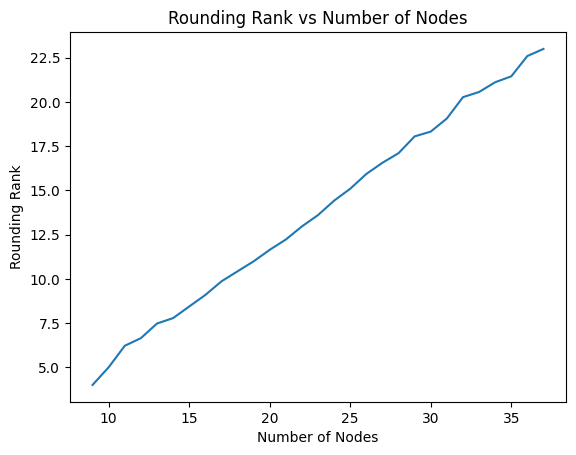

In [108]:
plot_nodes_to_rank(zinc_frobenius)

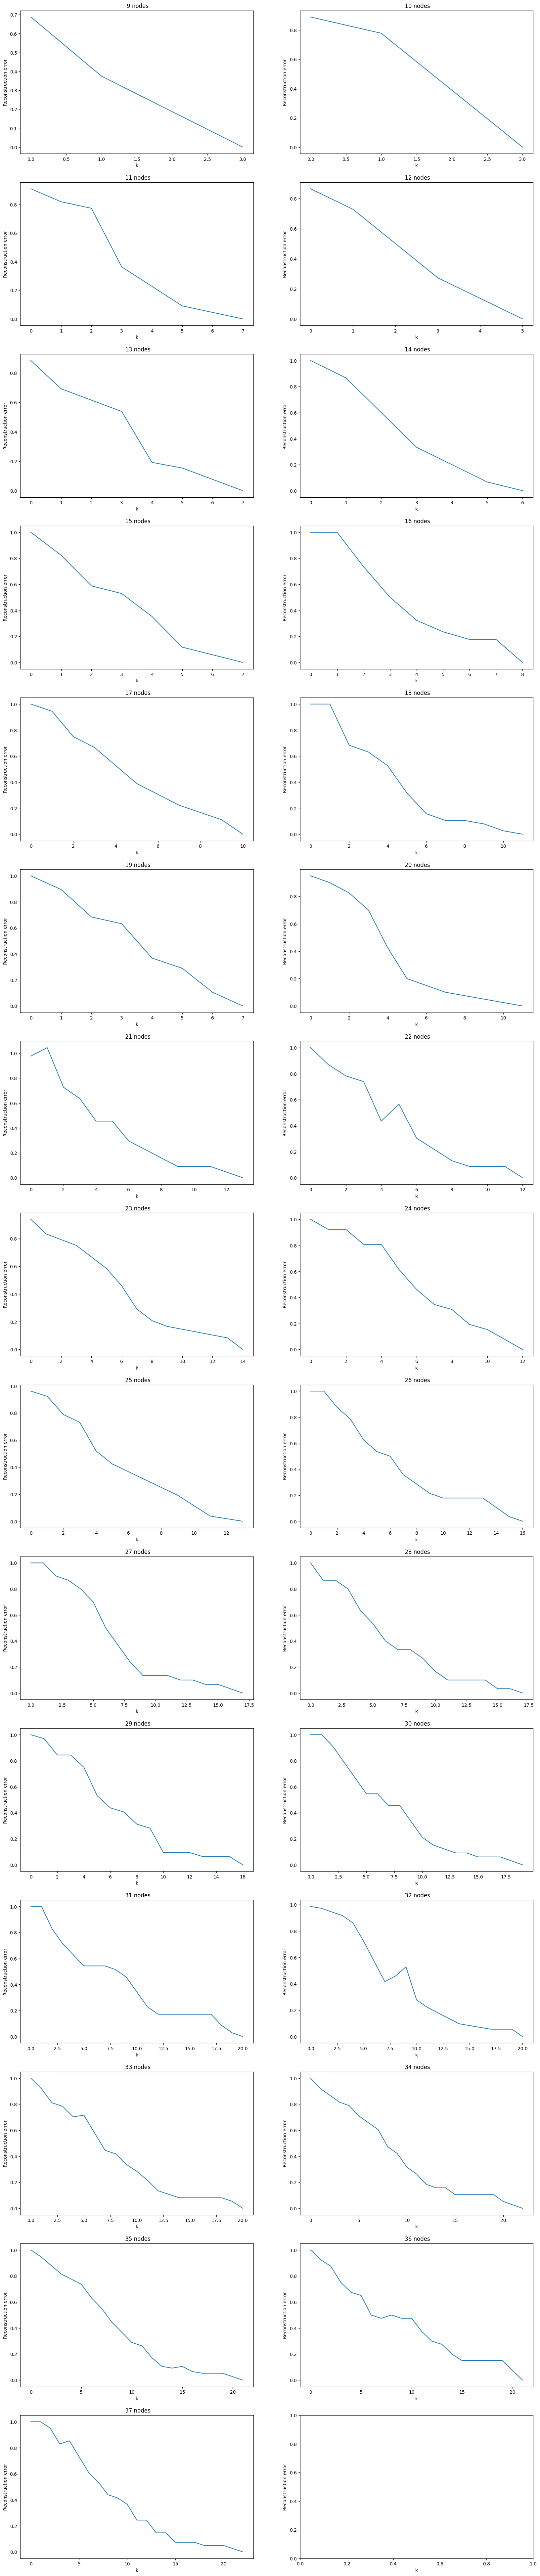

In [71]:
plot_errors_to_node_counts(zinc_frobenius.groupby("n_nodes")[["errors"]].first())

# Peptides

In [109]:
peptides = pd.read_parquet('results/peptides.parquet')

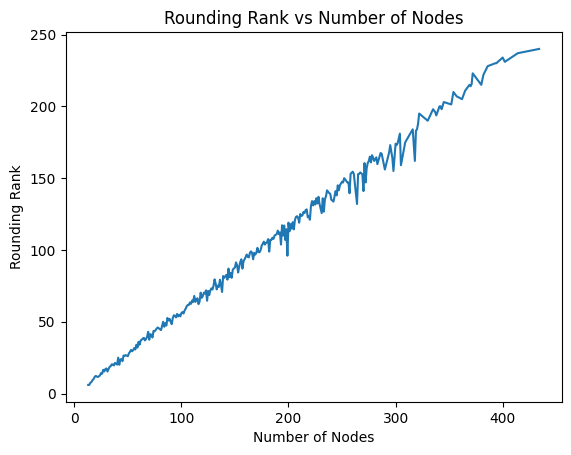

In [110]:
plot_nodes_to_rank(peptides)

In [117]:
bin_count = (peptides["n_nodes"].max() - peptides["n_nodes"].min()) // 10
peptides["n_nodes_bin"] = pd.cut(peptides["n_nodes"], bin_count).dropna()

/tmp/ipykernel_17732/2919996738.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_errors_to_node_counts(peptides.groupby("n_nodes_bin")[["errors", "n_nodes"]].first().set_index("n_nodes").dropna())


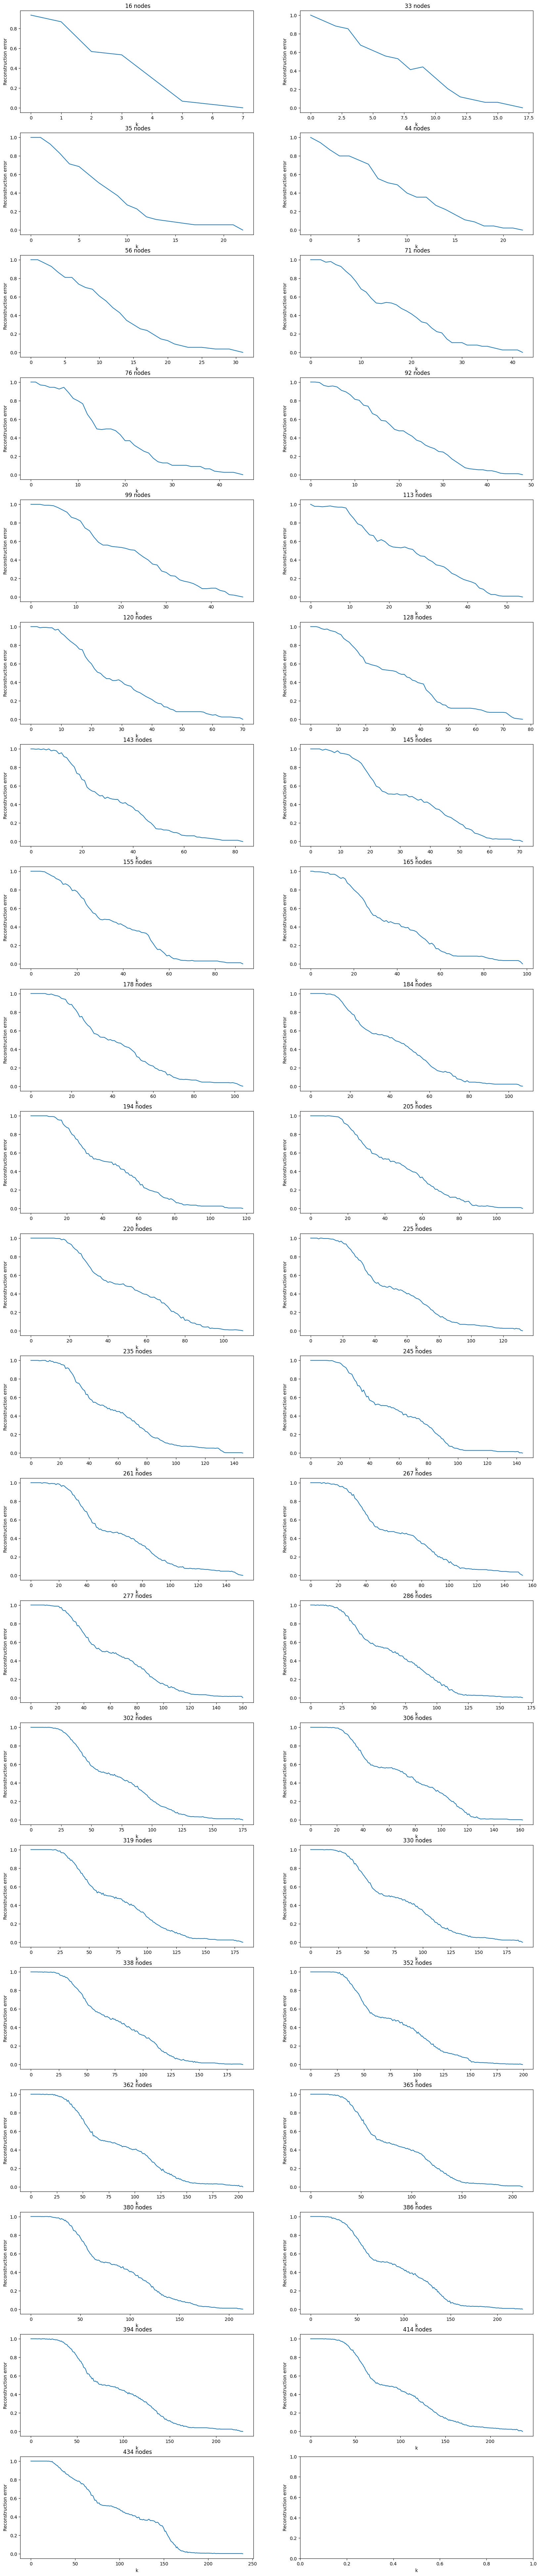

In [123]:
plot_errors_to_node_counts(peptides.groupby("n_nodes_bin")[["errors", "n_nodes"]].first().set_index("n_nodes").dropna())

# CIFAR10

In [32]:
cifar10 = pd.read_parquet('results/cifar2.parquet')

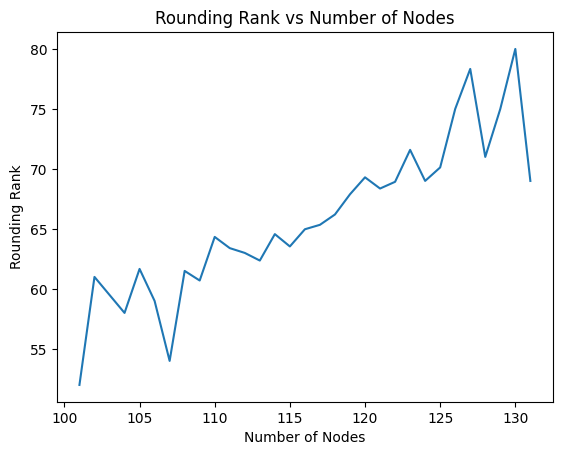

In [34]:
plot_nodes_to_rank(cifar10)

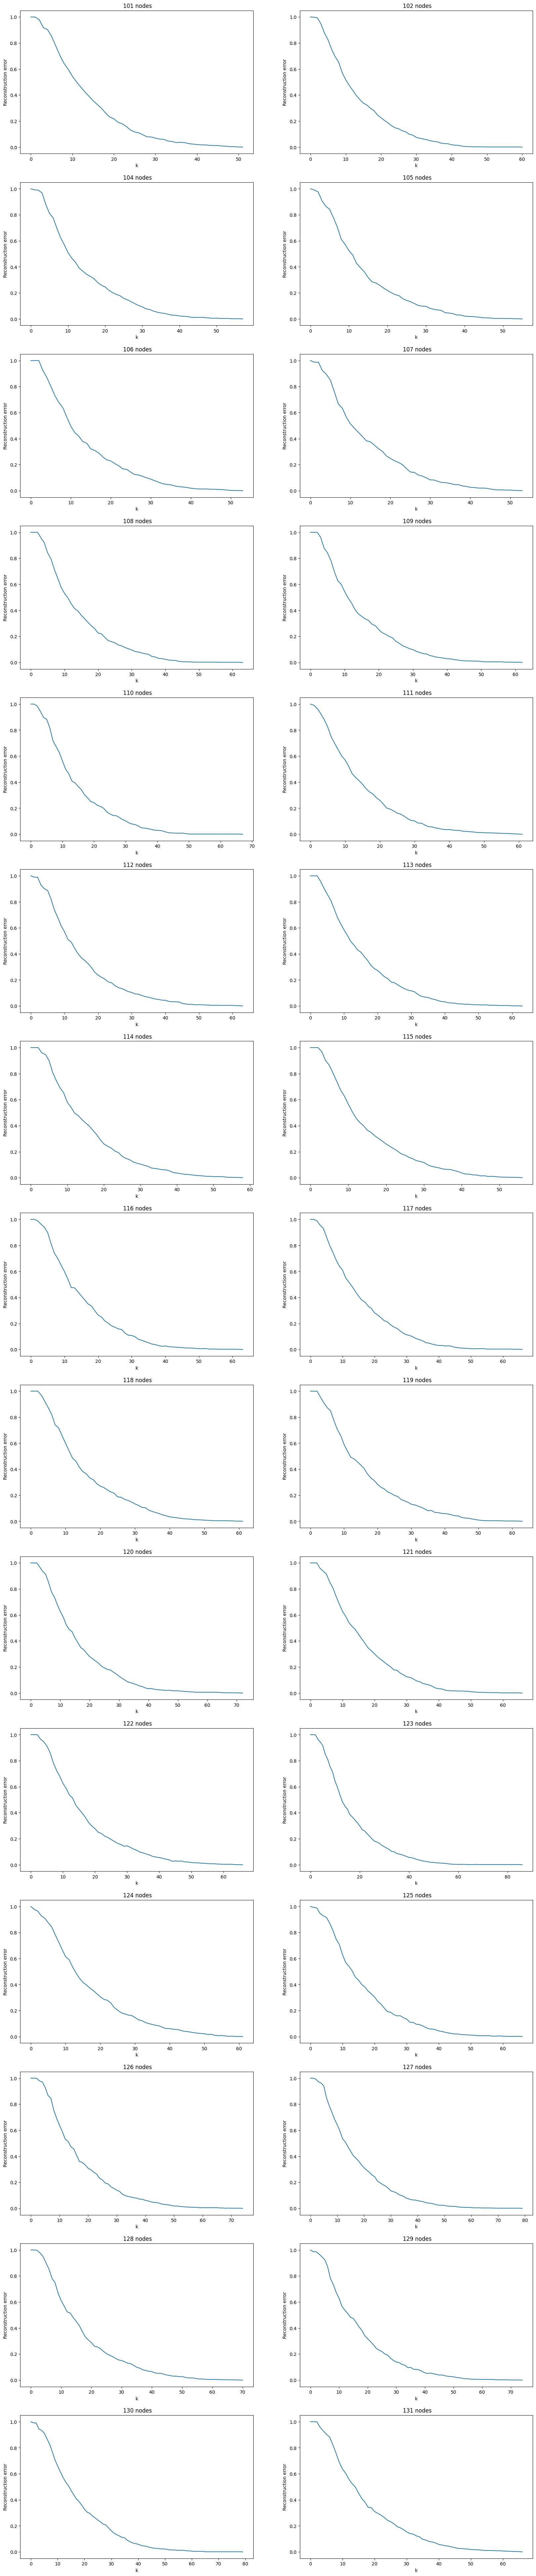

In [73]:
plot_errors_to_node_counts(cifar10.groupby("n_nodes")[["errors"]].first())